<a href="https://colab.research.google.com/github/Skkeshri/deep-learning/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

In [0]:
def sigmoid(w,x,b):
  return 1/(1 + np.exp(-(w*x + b)))

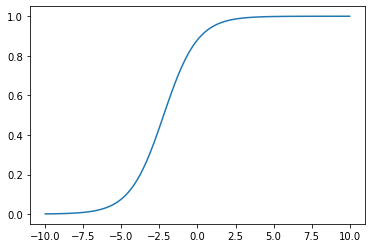

In [0]:
w = 0.9 #@param {type: "slider", min: -2, max: 2 , step : 0.1}
b = 2   #@param {type: "slider", min: -2, max: 2 , step : 0.1}
X = np.linspace(-10,10,100)
y = sigmoid(w,X,b)
plt.plot(X,y)
plt.show()

In [0]:
type(y)

numpy.ndarray

In [0]:
def sigmoid_2d(x1 , x2 , w1 , w2 , b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))


In [0]:
sigmoid_2d( 1.0 , 0 , 0.5 , 0 , 0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

(100,) (100,) (100, 100) (100, 100)


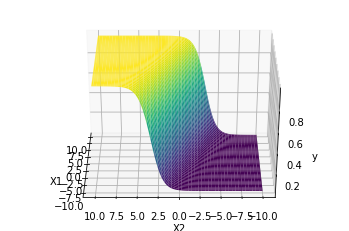

In [0]:
X1 = np.linspace(-10 , 10 ,100)
X2 = np.linspace(-10 , 10 ,100)

XX1 , XX2 = np.meshgrid(X1 ,X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)

w1 = 0.5
w2 = 1.5
b = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.view_init(30,180)

In [0]:
print(XX1.ndim ,XX2.ndim,Y.ndim)

2 2 2


In [0]:
#plt.contourf(XX1,XX2,Y)
#plt.show()

**Compute Loss**

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

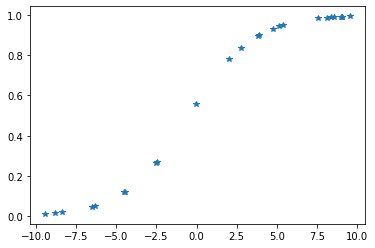

In [0]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss+= (y-sigmoid(w_est,x,b_est))**2
  return loss

In [0]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW , BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

WW.shape

(101, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

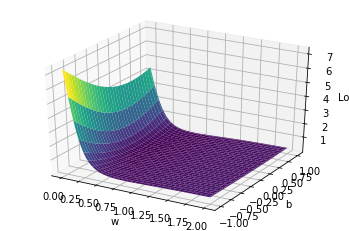

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
plt.show()

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])

print(i,j)

63 25


In [0]:
WW[i,j]

0.5

In [0]:
BB[i,j]

0.26

**Class for Sigmoid Neuron**

In [0]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x , self.w.T) + self.b
  
  def sigmoid(self , x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialize = True, display_loss = False):

    # initialize w, b
    if initialize:
      self.w = np.random.randn(1 , X.shape[1])
      self.b = 0

    if display_loss:
      loss = []

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw = 0
      db = 0

      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)

      self.w -= learning_rate * dw
      self.b -= learning_rate * db

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred, Y))
      
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()



  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  


**Toy data**

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0,]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
for i in range(10):
  print(sn.w, sn.b)
  sn.fit(X, Y, 1, 0.5, False)

[[-0.09124532 -2.02823755]] [0.00533899]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-0.03026914 -2.03722374]] [0.01420487]



[[ 0.01397953 -2.04029098]] [0.02097047]



[[ 0.04979804 -2.03989572]] [0.0267962]



[[ 0.08065273 -2.03704213]] [0.03216429]



[[ 0.10836048 -2.03222173]] [0.03732972]



[[ 0.13401866 -2.02568915]] [0.04245179]



[[ 0.15836477 -2.01756747]] [0.04764485]



[[ 0.18194228 -2.00789423]] [0.05300195]



[[ 0.20518818 -1.996642  ]] [0.05860787]


In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)

  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))

  ax.contourf(XX1, XX2, YY)
  ax.scatter(X[:, 0], X[:, 1], c = Y)
  ax.plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-0.44003305  0.6515679 ]] [0.02034212]



[[0.14256607 0.42852534]] [0.05382118]



[[ 0.88854221 -0.32485786]] [0.08351984]



[[ 1.03945728 -0.29799994]] [-0.02179488]



[[ 1.09917563 -0.45876662]] [-0.11563155]


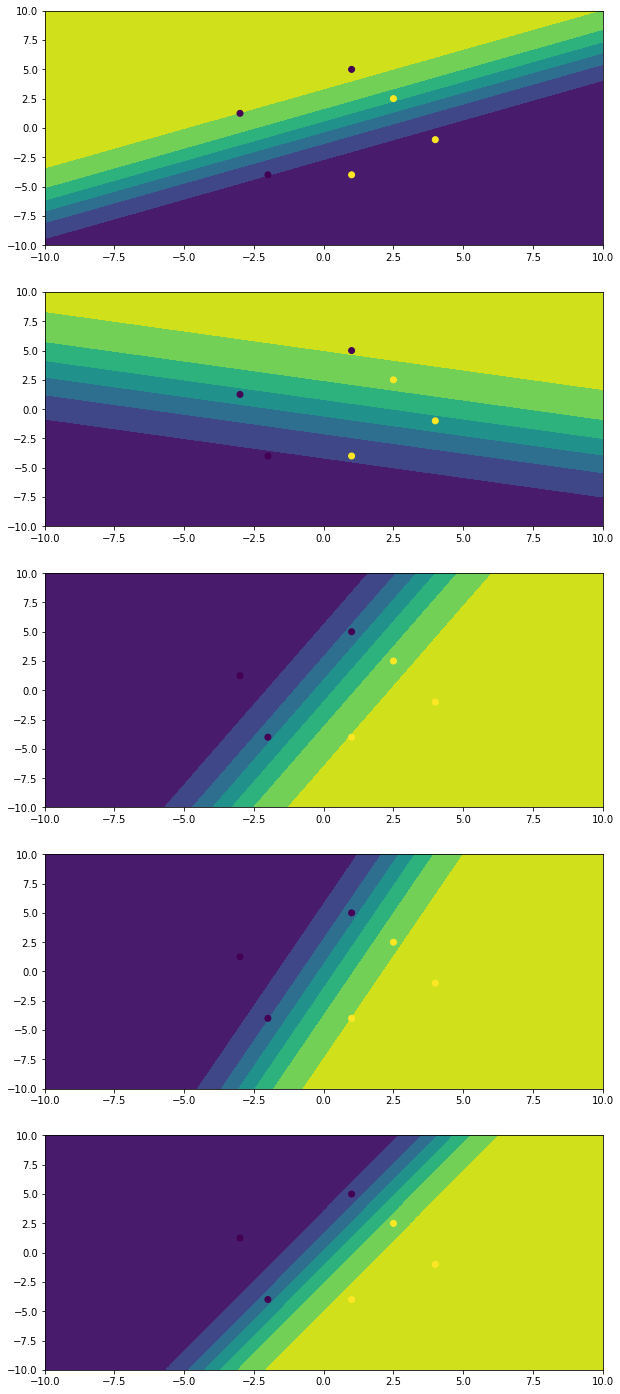

In [0]:
sn.fit(X, Y, 1, 0.50, True)
N = 5
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.75, False)

**Load Data**

In [0]:
!ls

drive  mobile_cleaned-1551253091700.csv  sample_data


In [0]:
import pandas as pd
data = pd.read_csv('mobile_cleaned-1551253091700.csv')

In [0]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [0]:
X = data.drop('Rating',axis =1)
y = data['Rating'].values

In [0]:
y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4.2
data['class'] = (data['Rating'] >= threshold).astype(np.int)

In [0]:
data['class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [0]:
Y_binarized = data['class'].values

  **Standardization**

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
R = np.random.random([100, 1])

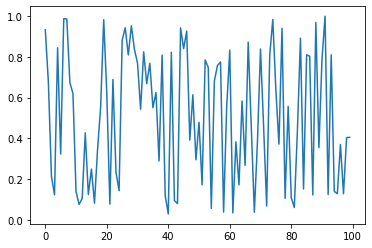

In [0]:
plt.plot(R)
plt.show()

In [0]:
R.mean()

0.5048851317235513

In [0]:
R.std()

0.31906670195718645

In [0]:
sc = StandardScaler()
sc.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
RS  = sc.transform(R)

In [0]:
RS.mean()

-6.328271240363392e-17

In [0]:
RS.std()

0.9999999999999998

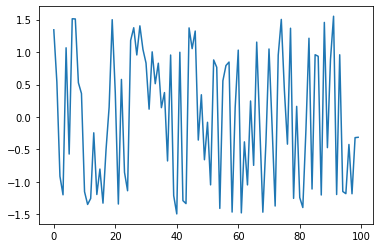

In [0]:
plt.plot(RS)
plt.show()

**Train_Test_Split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0, stratify = Y_binarized)

In [0]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [0]:
np.min(Y_scaled_train)

0.0

In [0]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]

In [0]:
scaled_threshold

0.6800000000000002

In [0]:
Y_binarised_train = (Y_scaled_train >= scaled_threshold).astype('int').ravel()

In [0]:
Y_binarised_test = (Y_scaled_test >= scaled_threshold).astype('int').ravel()

Fitting on real data

In [0]:
sn = SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


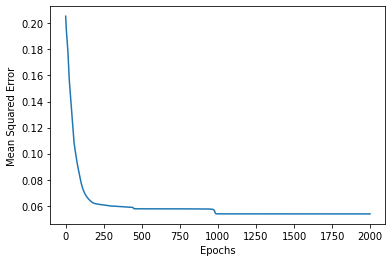

In [0]:
sn.fit(X_scaled_train, Y_scaled_train, epochs= 2000, learning_rate= 0.013, display_loss = True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train >= scaled_threshold).astype('int').ravel()
Y_pred_binarised_test = (Y_pred_test >= scaled_threshold).astype('int').ravel()

In [0]:
accuracy_train  = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [0]:
print(accuracy_train, accuracy_test)

0.7490196078431373 0.7906976744186046
